In [1]:
import json
from collections import defaultdict

In [2]:
with open("labeled_tz.json") as file:
    labeled = json.load(file)

In [3]:
classes_amount = defaultdict(int)
for item in labeled.values():
    for line in item:
        classes_amount[line["label"]] += 1

print(classes_amount)

defaultdict(<class 'int'>, {'title': 79, 'part': 151, 'item': 489, 'raw_text': 262, 'other': 29, 'toc': 395})


In [4]:
classes_list = [item for item in zip(classes_amount.values(), classes_amount.keys())]
classes_list = sorted(classes_list)[::-1]

classes_num = [item[0] for item in classes_list]
classes_name = [item[1] for item in classes_list]

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

classes_series = pd.Series(classes_num)
# Plot the figure.
plt.figure(figsize=(10, 5))
ax = classes_series.plot(kind='bar', ylim=(0, 520), color='green')
ax.set_title('Распределение классов')
ax.set_xlabel('Название класса')
ax.set_ylabel('Количество параграфов')
ax.set_xticklabels(classes_name, rotation=0)

rects = ax.patches

for rect, class_amount in zip(rects, classes_num):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, class_amount,
            ha='center', va='bottom')
plt.savefig('paragraph_distribution.png')

In [2]:
import os

labeled_files = os.listdir('paired_classifier')
labeled_files

['paired_classifier_000003_dDC.json',
 'paired_classifier_000007_fZs.json',
 'paired_classifier_000005_kgS.json',
 'paired_classifier_000000_Mv7.json',
 'paired_classifier_000004_45R.json',
 'paired_classifier_000010_TR7.json',
 'paired_classifier_000001_8qK.json',
 'paired_classifier_000008_V9S.json',
 'paired_classifier_000002_6wp.json',
 'paired_classifier_000006_GuB.json',
 'paired_classifier_000009_Q7t.json']

In [3]:
dicts_with_label = []

for file_with_label in labeled_files:
    if not file_with_label.endswith('.json'):
        continue
    with open(f"paired_classifier/{file_with_label}") as file:
        dicts_with_label.append(json.load(file))


In [4]:
print(dicts_with_label[0]['0'])

{'id': 0, 'task_path': 'images/000010_000000_img_bbox_c84c8773ecaf0d1b130a0c10f65251c1_116d57e54de5f25c2eacf747ff291574_c84c8773ecaf0d1b130a0c10f65251c1_1be2ec6410f153599bcd30c261130115.jpg', 'labeled': ['greater'], 'data': {'_annotations': [{'end': 214, 'value': '0', 'name': 'indentation', 'start': 0}, {'end': 214, 'value': 'center', 'name': 'alignment', 'start': 0}, {'end': 214, 'value': 'True', 'name': 'bold', 'start': 0}, {'end': 214, 'value': '13.0', 'name': 'size', 'start': 0}, {'end': 214, 'value': 'heading', 'name': 'style', 'start': 0}], 'original_document': '1615379447_563.docx', '_line': 'на выполнение работ по созданию системы защиты персональных данных \nклиентского сегмента АИС МФЦ в многофункциональном центре \nпредоставления государственных и муниципальных услуг \nгородского округа город Дзержинск\n', '_uid': 'c84c8773ecaf0d1b130a0c10f65251c1_116d57e54de5f25c2eacf747ff291574', '_metadata': {'page_id': 0, 'line_id': 2, 'paragraph_type': 'root', 'predicted_classes': None}

In [9]:
import re

get_uids = re.compile(r"[\w/]+_([a-z\d]+_[a-z\d]+)_([a-z\d]+_[a-z\d]+)\.jpg")
match = get_uids.match(dicts_with_label[0]['0']['task_path'])
uid_1, uid_2 = match.groups()
uid_1, uid_2

('c84c8773ecaf0d1b130a0c10f65251c1_116d57e54de5f25c2eacf747ff291574',
 'c84c8773ecaf0d1b130a0c10f65251c1_1be2ec6410f153599bcd30c261130115')

In [10]:
uids2label = {}

for labeled_task in dicts_with_label:
    for line in labeled_task.values():
        match = get_uids.match(line['task_path'])
        uid_1, uid_2 = match.groups()
        uids2label[(uid_1, uid_2)] = line['labeled'][0]

In [11]:
len(uids2label)

4557

In [12]:
from document_parser import DOCXParser

uid2data = {}

for filename in os.listdir('.'):
    if not filename.endswith(".docx"):
        continue

    doc_parser = DOCXParser()
    doc_parser.parse(os.path.abspath(filename))
    paragraphs = doc_parser.get_lines_with_meta()

    for paragraph in paragraphs:
        uid2data[paragraph['uid']] = paragraph

In [13]:
len(uid2data)

1401

In [21]:
pair_labeled = {}

for (uid_1, uid_2), label in uids2label.items():
    if label == "":
        continue
    try:
        uid_1_data = uid2data[uid_1]
        uid_2_data = uid2data[uid_2]

        pair_labeled[f'{uid_1}_{uid_2}'] = {"label": label,
                                            "data": [uid_1_data, uid_2_data]}
    except KeyError as err:
        print(err)

'37fc7f127ff8ccefbadc5e62bf1c26b4_adac464fb909dd1f37b80d3ea1ddb9da'
'35d6836ff2ce897b395bd9a4ecac69d7_adac464fb909dd1f37b80d3ea1ddb9da'
'e9e07da48e7e2128bf4ba87a77de8ac1_adac464fb909dd1f37b80d3ea1ddb9da'
'678465daa9dac1fca30497fa3bfb8b14_adac464fb909dd1f37b80d3ea1ddb9da'
'e28eb4b5192e948e7ee76d706eb9c94f_1'
'e28eb4b5192e948e7ee76d706eb9c94f_1'
'e28eb4b5192e948e7ee76d706eb9c94f_1'
'e28eb4b5192e948e7ee76d706eb9c94f_1'
'd8268d6688b0463559cf1a7607b442e5_fbbca14ff78ad2dac75d9dca60338d87'
'c739b2a6aaef80d527b129f5a33f4404_fbbca14ff78ad2dac75d9dca60338d87'
'c61ba34aa131e09765d8fe762b1aedf7_fbbca14ff78ad2dac75d9dca60338d87'
'4cdbb62e7b252c4284be8030ad8f476f_fbbca14ff78ad2dac75d9dca60338d87'
'c739b2a6aaef80d527b129f5a33f4404_1'
'c739b2a6aaef80d527b129f5a33f4404_1'
'c739b2a6aaef80d527b129f5a33f4404_1'
'c739b2a6aaef80d527b129f5a33f4404_1'
'a07704d780e9470de3cfbfdc5d345e5e_28e466087d8f9f2c796a7f3674bf97d5'
'1481c92cb1019d1e07c5c4ca1addba9e_28e466087d8f9f2c796a7f3674bf97d5'
'1fbdea783dff938b389acff

In [22]:
len(pair_labeled)

4476

In [23]:
with open("labeled_pair.json", "w") as write_file:
    json.dump(pair_labeled, write_file)

defaultdict(<class 'int'>, {'greater': 1165, 'equals': 2437, 'less': 874})


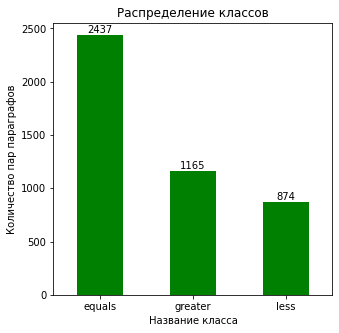

In [26]:
classes_amount = defaultdict(int)
for item in pair_labeled.values():
    classes_amount[item["label"]] += 1

print(classes_amount)

classes_list = [item for item in zip(classes_amount.values(), classes_amount.keys())]
classes_list = sorted(classes_list)[::-1]
classes_num = [item[0] for item in classes_list]
classes_name = [item[1] for item in classes_list]

import pandas as pd
import matplotlib.pyplot as plt

classes_series = pd.Series(classes_num)
# Plot the figure.
plt.figure(figsize=(5, 5))
ax = classes_series.plot(kind='bar', ylim=(0, 2550), color='green')
ax.set_title('Распределение классов')
ax.set_xlabel('Название класса')
ax.set_ylabel('Количество пар параграфов')
ax.set_xticklabels(classes_name, rotation=0)

rects = ax.patches

for rect, class_amount in zip(rects, classes_num):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, class_amount,
            ha='center', va='bottom')
plt.savefig('pair_distribution.png')
